In [148]:
from selenium import webdriver

from selenium.webdriver.common.by import By

from selenium.webdriver.common.keys import Keys
import pandas as pd
from sqlalchemy import create_engine

In [149]:
# 웹드라이버를 이용하여 구글크롬 브라우져를 오픈
driver = webdriver.Chrome()

In [150]:
# 특정 주소로 요청을 보낸다.
driver.get('https://www.naver.com')

In [151]:
# Tag 중 id가 query 인 태그를 선택하여 변수에 저장
search_element = driver.find_element(By.ID, 'query')

In [152]:
search_element

<selenium.webdriver.remote.webelement.WebElement (session="42f097c0bc3df2a4d3536b0b00951781", element="f.3EA3F85AB2784AE8BB0A1329394FA083.d.2D5E8E1EE5FD1D257E14C8E8A9071ADC.e.88")>

In [153]:
# search_element(검색어창)에 특정 텍스트를 입력(테이터를 보냄)한다.
search_element.send_keys('아이폰')

In [154]:
# search_element에서 ENTER이벤트를 발생
search_element.send_keys(Keys.ENTER)

In [155]:
# 쇼핑 버튼(TAG)을 선택한다.
# By안에 LINK_TEXT 이용
# LINK_TEXT가 쇼핑인 태그 -> 
# 모두 몇개인가
# len(driver.find_elements(By.LINK_TEXT, '쇼핑'))
# 조건에 맞는 태그의 개수가 1개 이므로 클릭 이벤트 발생
# find_elements에서는 함수 안먹음. List이기 때문

0

In [156]:
driver.find_element(By.LINK_TEXT, '쇼핑')

<selenium.webdriver.remote.webelement.WebElement (session="42f097c0bc3df2a4d3536b0b00951781", element="f.3EA3F85AB2784AE8BB0A1329394FA083.d.390CF2D2531328CF3C665DF3FDE2C98D.e.1877")>

In [157]:
driver.find_element(By.LINK_TEXT, '쇼핑').click()

In [158]:
# 쇼핑 페이지에서 검색어의 결과(물건의 가격과 제품명)을 크롤링
# 크롤링 -> 해당 페이지의 소스코드를 불러온다.
html_data = driver.page_source

'<html lang="ko" data-useragent="mozilla/5.0 (macintosh; intel mac os x 10_15_7) applewebkit/537.36 (khtml, like gecko) chrome/140.0.0.0 safari/537.36" data-platform="macintel"><head> <meta charset="utf-8"> <meta name="referrer" content="strict-origin-when-cross-origin">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="아이폰 : 네이버 검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'아이폰\'의 네이버 검색 결과입니다."> <meta name="description" lang="ko" content="\'아이폰\'의 네이버 검색 결과입니다."> <title>아이폰 : 네이버 검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search
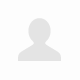
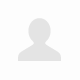
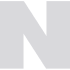
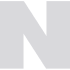

In [159]:
html_data

In [160]:
# bs4 라이브러리 안에 있는 BearutifulSoup를 이용하여 html_data를 parsing(데이터의 타입을 변환)
from bs4 import BeautifulSoup as bs

In [161]:
soup = bs(html_data, 'html.parser')

In [162]:
# html_data가 2개의 탭 중 어떤 소스코드인지 확인
# 탭의 제목이 다르기 때문에 title Tag 확인
# 특정 태그를 확인
soup.title

<title>아이폰 : 네이버 검색</title>

In [163]:
# page_source가 첫 번째 탭인 것을 확인
# 두 번째 탭으로 page_source를 이동
# 텝의 정보를 확인
# driver에서 탭의 주소를 확인
driver.window_handles

['3EA3F85AB2784AE8BB0A1329394FA083', '4AC24FABA0DC0AC9F5C6FBD824B20FA2']

In [164]:
# driver에서 탭을 이동
driver.switch_to.window(
    driver.window_handles[1]
)

In [177]:
html_data2 = driver.page_source
soup2 = bs(html_data2, 'html.parser')

In [178]:
soup2.title

<title data-next-head="">아이폰 : 네이버 가격비교</title>

#### 네이버 쇼핑 크롤링
1. div 태그 중 id 가 'content'인 태그를 선택하여 저장(content_data)
2. 저장한 태그에서 div 태그 중 class가 'product_item__KQayS' 인 태그 정보를 모두 저장(div_list)
3. div_list에서 div 태그 중 class가 'product_title__ljFM_'인 태그의 문자를 추출(상품명)
4. div_list에서 span 태그 중 class 가 'price'인 태그의 문자를 추출(상품격)

In [179]:
content_data = soup2.find(
    'div',
    attrs={
        'id' : 'content'
    }
)

In [180]:
type(content_data)

bs4.element.Tag

In [169]:
import re

In [170]:
# # content_data에서 div 중 classs가 product_item__KQayS인 태그
# # class의 이름에 'product_item'이 포함되어있는 태그
# len(
#     content_data.find_all(
#         'div',
#         # attrs={
#         #     'class' : 'product_item__KQayS'
#         # }
#         attrs = {
#             'class' : re.compile('product_item')
#         }
#     )
# )

In [181]:
div_list = content_data.find_all(
        'div',
        # attrs={
        #     'class' : 'product_item__KQayS'
        # }
        attrs = {
            'class' : re.compile('product_item')
        }
    )

In [182]:
div_data = div_list[0]

In [183]:
item_name = div_data.find(
    'div',
    attrs = {
        'class' :re.compile('product_title')
    }
).get_text()

In [184]:
item_price = div_data.find(
    'span',
    attrs = {
        'class' : "price"
    }
).get_text()

In [ ]:
# 상품의 이름과 상품의 가격을 dict 형태로 생성

# 비어있는 Dict 생성
dict_data = {}

In [ ]:
dict_data['상품명'] = item_name
dict_data['가격'] = item_price
dict_data

{'상품명': 'Apple 애플 아이폰 13 미니 128GB 새상품', '가격': '298,000원'}

In [ ]:
values = []
for div_data in div_list:
    item_name = div_data.find(
    'div',
    attrs = {
        'class' :re.compile('product_title')
    }
    ).get_text() 
    item_price = div_data.find(
    'span',
    attrs = {
        'class' : "price"
    }
    ).get_text()
    item_url = div_data.find('a')['href']
    dict_data = {
        '상품명' : item_name,
        '가격' : item_price,
        'url' : item_url
    }
    values.append(dict_data)

values

[{'상품명': 'Apple 애플 아이폰 13 미니 128GB 새상품',
  '가격': '298,000원',
  'url': 'https://cr.shopping.naver.com/adcr?x=Y198jn4IrOK%2FYkAMayzbZf%2F%2F%2Fw%3D%3DsqatXp22F14htuBjn2gM6AK1odJ2%2F6LBtogIwFjN3ri1yoYErd7Wx1dfdVO6hh7qVzW3d7PY9yt1TiO%2BjL98rwkbAoeRkvpJaJBMwPydFbM8QhkkHXK4%2FmSRy5icYE%2F27qdaFQrvxtDLYhqXP2MsWe%2FACNqGh8N6CnB2BZK35Zn%2BHrKfSUNBk8zeIlIOBupEJMBbAUTLhEczrfo6o%2BFCYJ9koDZhZTyE2PqJzLGA4wO5rFOggmiXu3%2F8keUf6BliA51Xq4PWjIMtDQCLN123BUj%2FG%2F%2FKvHTDPfPpd5mpWFu%2FDpmNu2Rs3tEPrV0ZTODsbWqyaFa2xLbpwGCJChqMDqrxdYdc%2FPhnpj6PsS8FCrFwKfsqh8weCgHk8Od6IeJ642HvQrG1q57G6KIPveES%2FyMqOLQJHdGdtfrEXEiqov2DrJiJPn2%2BM3FA09mchd77HzWFgWiA8J5ImHEQBy8VCc4ODj7U4RTNsjwbJ6ypzRs9oTXQpM8q870erfVNNqVJ%2FHaEHQ%2B8%2BFU2ZxhzmZfYClqU7PluOPI8xUlO1bugvxKxjGRfK5wg06sS3WunRnJLUPZg0e63%2Fi1U9TOC1N3W5Vp6DyzOVGjOykBurUXFZX1u8tv4Cur270FBU5NzvbDhhnLywBF6TPdyrHi5pSyQkVg1QmAmnoJRdq4K9btjkCM0%3D&nvMid=88573763568&catId=50001519'},
 {'상품명': '아이폰 16 프로 128GB [자급제]',
  '가격': '최저1,538,900원',
  'url': 'https://cr.shopping.na

In [ ]:
div_data = div_list[0]

In [ ]:
# div_ data에서 a태그(하이퍼링크) 첫번쨰 정보를 확인하여 href 속성의 값을 출력
# html문서에서 첫번째 태그의 정보를 확인
    # htmldata.태그명
    # htmldata.find(태그명)
div_data.a['href']
div_data.find('a')['href']

'https://cr.shopping.naver.com/adcr?x=Y198jn4IrOK%2FYkAMayzbZf%2F%2F%2Fw%3D%3DsqatXp22F14htuBjn2gM6AK1odJ2%2F6LBtogIwFjN3ri1yoYErd7Wx1dfdVO6hh7qVzW3d7PY9yt1TiO%2BjL98rwkbAoeRkvpJaJBMwPydFbM8QhkkHXK4%2FmSRy5icYE%2F27qdaFQrvxtDLYhqXP2MsWe%2FACNqGh8N6CnB2BZK35Zn%2BHrKfSUNBk8zeIlIOBupEJMBbAUTLhEczrfo6o%2BFCYJ9koDZhZTyE2PqJzLGA4wO5rFOggmiXu3%2F8keUf6BliA51Xq4PWjIMtDQCLN123BUj%2FG%2F%2FKvHTDPfPpd5mpWFu%2FDpmNu2Rs3tEPrV0ZTODsbWqyaFa2xLbpwGCJChqMDqrxdYdc%2FPhnpj6PsS8FCrFwKfsqh8weCgHk8Od6IeJ642HvQrG1q57G6KIPveES%2FyMqOLQJHdGdtfrEXEiqov2DrJiJPn2%2BM3FA09mchd77HzWFgWiA8J5ImHEQBy8VCc4ODj7U4RTNsjwbJ6ypzRs9oTXQpM8q870erfVNNqVJ%2FHaEHQ%2B8%2BFU2ZxhzmZfYClqU7PluOPI8xUlO1bugvxKxjGRfK5wg06sS3WunRnJLUPZg0e63%2Fi1U9TOC1N3W5Vp6DyzOVGjOykBurUXFZX1u8tv4Cur270FBU5NzvbDhhnLywBF6TPdyrHi5pSyQkVg1QmAmnoJRdq4K9btjkCM0%3D&nvMid=88573763568&catId=50001519'

In [ ]:
type(content_data)

bs4.element.Tag

In [172]:
# driver 스크롤을 가장 밑으로 내린다.
driver.execute_script(
    "window.scrollTo(0, document.body.scrollHeight);"
)

In [173]:
driver.execute_script(
    "window.scrollBy(0,800);"
)

In [ ]:
# BeautifulSoup를 이용해서 데이터 파싱
# 광고상품을 제외한 모든 상품의 이름과 가격 링크 주소를 2차원 데이터(리스트 안에 딕셔너리)로 생성
# 생성된 2차원 데이터를 데이터프레임으로 생성
# 검색어(아이폰)을 파일명으로 csv파일을 생성하고 인덱스는 제외한다.



In [174]:
html_data3 = driver.page_source
soup3 = bs(html_data3, 'html.parser')

#div content = id
content_data = soup3.find(
    'div',
    attrs={
        'id' : 'content'
    }
)

# div class = product_item
div_list = content_data.find_all(
        'div',
        attrs = {
            'class' : re.compile('product_item')
        }
    )

# 한 item 당 이름, 가격, url 추출 반복문
values = []
for div_data in div_list:
    item_name = div_data.find(
    'div',
    attrs = {
        'class' :re.compile('product_title')
    }
    ).get_text() 
    item_price = div_data.find(
    'span',
    attrs = {
        'class' : "price"
    }
    ).get_text()
    item_url = div_data.find('a')['href']
    dict_data = {
        '상품명' : item_name,
        '가격' : item_price,
        'url' : item_url
    }
    values.append(dict_data)

df = pd.DataFrame(values)


In [175]:
df

,상품명,가격,url
0,Apple 애플 아이폰 13 미니 128GB 새상품,"298,000원",https://cr.shopping.naver.com/adcr?x=yMniHWRuj...
1,아이폰 16 프로 128GB [자급제],"최저1,538,900원",https://cr.shopping.naver.com/adcr?x=deEtUD6GW...
2,아이폰 16 프로 256GB [자급제],"최저1,647,990원",https://cr.shopping.naver.com/adcr?x=0JGxD%2Bv...
3,애플 아이폰 13 미니 128GB 미개봉 새제품,"298,000원",https://cr.shopping.naver.com/adcr?x=QC1mkuiQV...
4,아이폰 16 128GB [자급제],"최저1,150,000원",https://cr.shopping.naver.com/adcr?x=GbdfWfxDA...
5,아이폰 15 128GB [자급제],"최저949,900원",https://cr.shopping.naver.com/adcr?x=%2FCIzPRT...
6,아이폰 16 256GB [자급제],"최저1,394,000원",https://cr.shopping.naver.com/adcr?x=excYmFihB...
7,아이폰 15 프로 256GB [자급제],"최저1,393,900원",https://cr.shopping.naver.com/adcr?x=WHW%2BA1j...
8,Apple 아이폰 12 mini 자급제 화이트 128GB,"458,000원",https://cr.shopping.naver.com/adcr?x=%2B%2Fvf9...
9,해외아이폰 5S 무음 공기계 인스타 카메라 감성사진 학생폰 세컨폰 실버 16GB 항공,"79,500원",https://cr.shopping.naver.com/adcr?x=OMDMIxH0X...


In [176]:
df.to_csv('./iphone.csv', index = False)

In [191]:
# driver을 종료
# driver.close()

In [190]:
driver.quit()